## Задание

#### Основная часть

1. Попробовать построить все графики из тех, что были на уроке по Seaborn
2. Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

#### Дополнительная часть

1. Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

2. Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

3. Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 9,12

In [2]:
df_original = pd.read_csv("test_cluster.csv", encoding="cp1251", sep=";")
df = df_original.copy()
df = df.drop(["loan_to_deposit"], axis=1)
df = df.dropna()
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,avg_td_balance_1Y,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,Avg_trx,avgtrx_to_balance,nbi
9,36,М,<100,154,0.0,0.0,32413.52,0.0,0.00,83,...,0.0,32413.52,34119.49,38051.374167,0.0,0.0,0.0,3915.032892,4.383411,6065.052515
10,56,F,<100,165,0.0,0.0,61189.99,70000.0,1524.58,341,...,70000.0,44360.86,61189.99,43218.413333,0.0,0.0,0.0,1323.992698,0.226536,8009.940315
11,19,М,100-500,40,0.0,0.0,0.00,0.0,19.65,72,...,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,215.688611,0.992718,684.233442
12,20,F,1M+,3,0.0,0.0,0.00,0.0,10338.17,105,...,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,1202.188857,0.063129,157.694118
13,51,М,100-500,37,0.0,0.0,0.00,0.0,8738.12,189,...,0.0,0.00,0.00,0.000000,0.0,0.0,0.0,4145.593968,0.130954,3054.122311


### Графики matplotlib из лекции

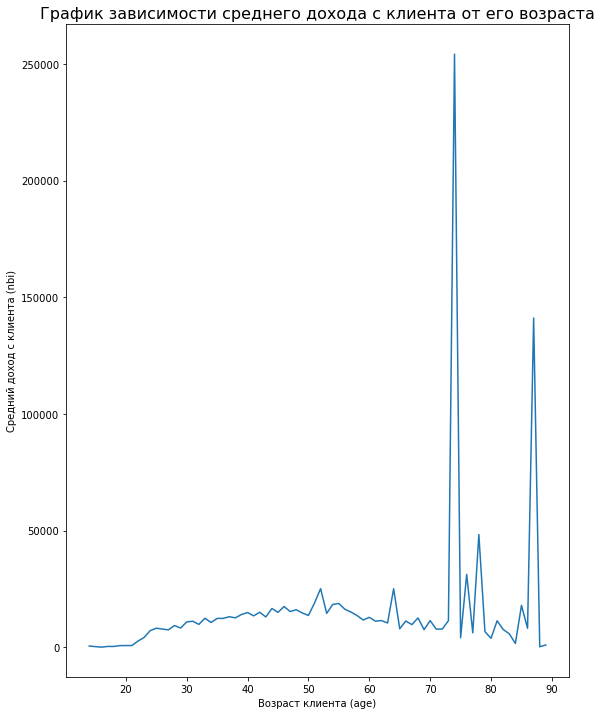

In [3]:
# Линейная диаграмма

df_vis = df.copy()
df_vis = df_vis.groupby("age").mean()

x = df_vis.index
y = df_vis.nbi

plt.plot(x,y)
plt.xlabel("Возраст клиента (age)")
plt.ylabel("Средний доход с клиента (nbi)")
plt.title("График зависимости среднего дохода с клиента от его возраста", 
          size=16)
plt.show()

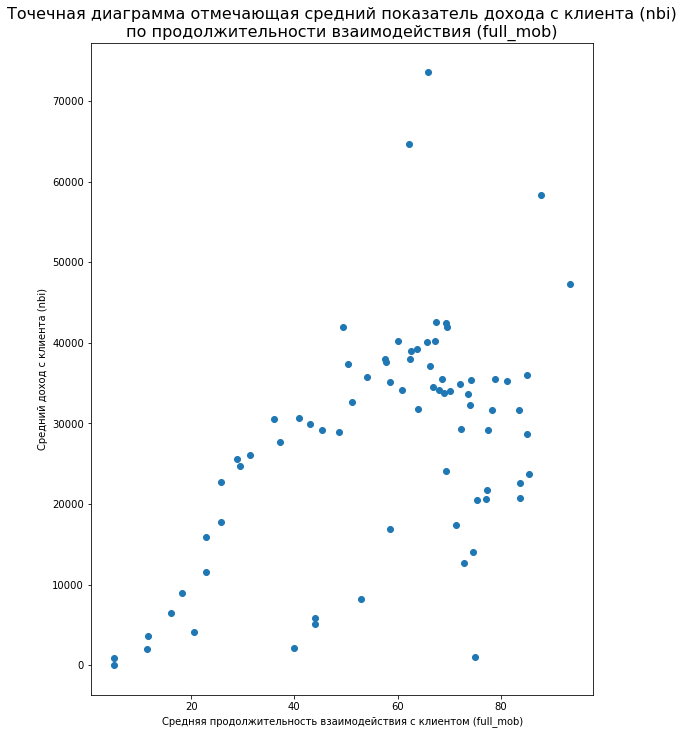

In [4]:
# Точечная диаграмма

df_vis = df.copy()
df_vis = df_vis.groupby("age").mean()

x = df_vis.full_mob
y = df_vis.income
plt.scatter(x, y)

plt.xlabel("Средняя продолжительность взаимодействия с клиентом (full_mob)")
plt.ylabel("Средний доход с клиента (nbi)")
plt.title("Точечная диаграмма отмечающая средний показатель дохода с клиента (nbi)\n"\
          "по продолжительности взаимодействия (full_mob)",
         size=16)
plt.show()

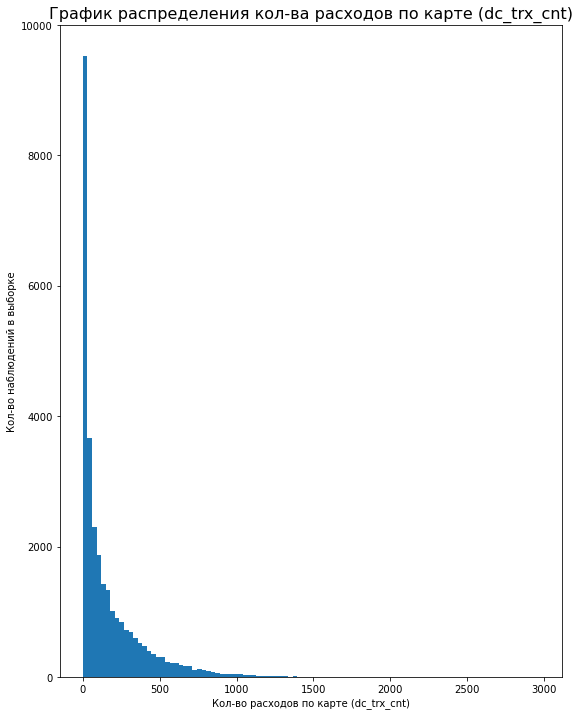

In [5]:
# Гистограмма

df_vis = df.copy()
x = df_vis.dc_trx_cnt
plt.hist(x, bins=100)

plt.xlabel("Кол-во расходов по карте (dc_trx_cnt)")
plt.ylabel("Кол-во наблюдений в выборке")
plt.title("График распределения кол-ва расходов по карте (dc_trx_cnt)", 
          size=16)
plt.show()

### Графики seaborn из лекции

In [7]:
# Формирует строку запроса для удаления слишком больших/малых значений
def get_drop_extreme_values_query(df, features):
    queries = []
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3-Q1
        k=1.5 # всеравно остается много выбросов
        sub_query = f"(({feature} == 0) | ({Q1-IQR*k} < {feature} < {Q3+IQR*k}))"
        queries.append(sub_query)
    query = " & ".join(q for q in queries)
    return query

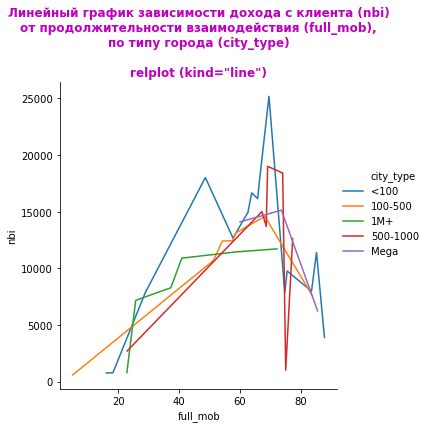

In [8]:
df_vis = df.copy()
df_vis = df_vis.groupby("age").mean()
query = get_drop_extreme_values_query(df_vis, ["nbi", "income"])

sns.relplot(
    x='full_mob', 
    y='nbi',
    hue=df.city_type,
    data=df_vis.query(query), 
    kind='line'
)
plt.title('Линейный график зависимости дохода с клиента (nbi)\n'\
          'от продолжительности взаимодействия (full_mob),\n'\
          'по типу города (city_type)\n\n'\
          'relplot (kind="line")', 
          size=12, color='m', weight='bold');

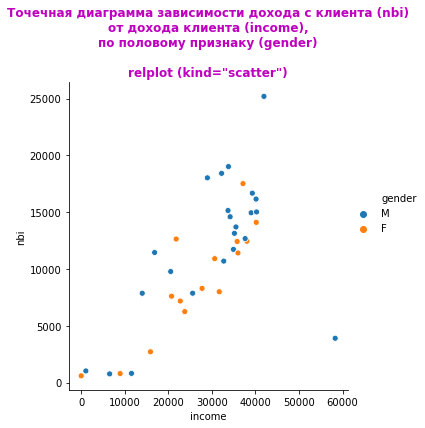

In [9]:
df_vis = df.copy()
df_vis = df_vis.groupby("age").mean()
query = get_drop_extreme_values_query(df_vis, ["nbi", "income"])

sns.relplot(
    x='income', 
    y='nbi',
    hue=df.gender,
    data=df_vis.query(query), 
    kind='scatter'
)
plt.title('Точечная диаграмма зависимости дохода с клиента (nbi)\n'\
          'от дохода клиента (income),\n'\
          'по половому признаку (gender)\n\n'\
          'relplot (kind="scatter")', 
          size=12, color='m', weight='bold');

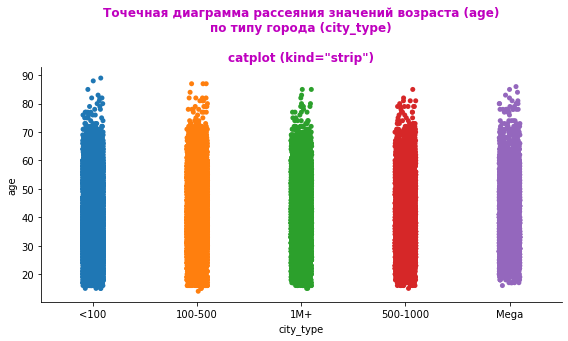

In [10]:
df_vis = df.copy()
city_order = list(df_vis.city_type.unique())

sns.catplot(
    x='city_type',
    y='age', 
    data=df_vis, 
    order=city_order,
    jitter=True,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True
)

plt.title('Точечная диаграмма рассеяния значений возраста (age)\n'\
          'по типу города (city_type)\n\n'\
          'catplot (kind="strip")', 
          size=12, color='m', weight='bold');

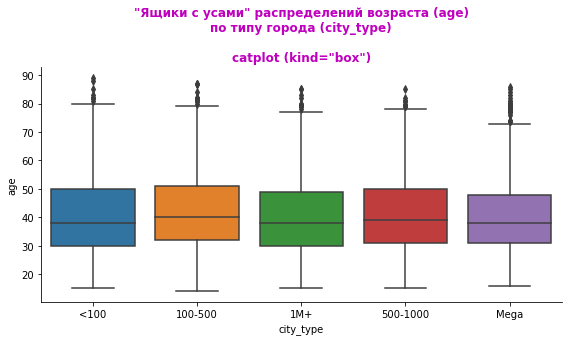

In [11]:
df_vis = df.copy()

sns.catplot(
    x='city_type', 
    y='age', 
    data=df_vis, 
    kind='box', 
    height=4, 
    aspect=2
); 

plt.title('"Ящики с усами" распределений возраста (age)\n'\
          'по типу города (city_type)\n\n'\
          'catplot (kind="box")', 
          size=12, color='m', weight='bold');

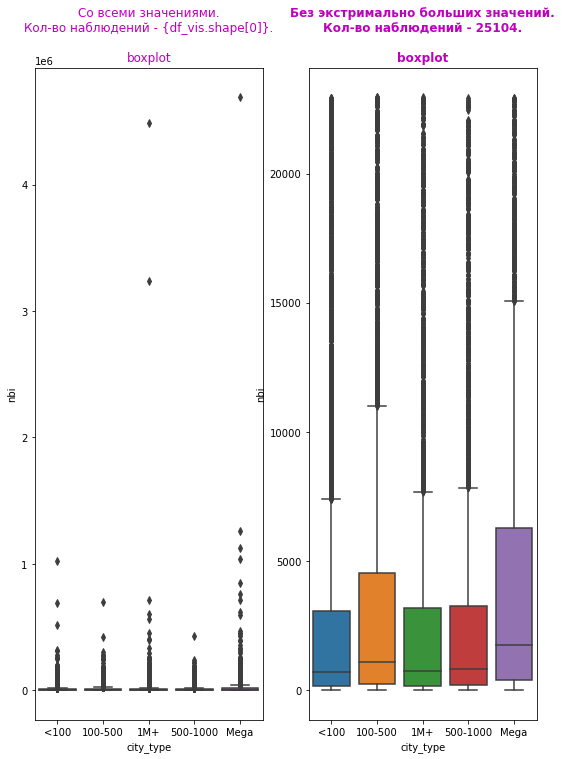

In [16]:
df_vis = df.copy()

query = get_drop_extreme_values_query(df_vis, ["nbi"])
df_after_drop_extreme_values = df_vis.query(query)

fig, ax = plt.subplots(ncols=2)

sns.boxplot(
    x='city_type', 
    y='nbi', 
    data=df_vis, 
    ax=ax[0]
);
ax[0].set_title(f'Со всеми значениями.\n'\
                'Кол-во наблюдений - {df_vis.shape[0]}.\n\n'\
                'boxplot', 
                size=12, color='m');

sns.boxplot(
    x='city_type', 
    y='nbi', 
    data=df_after_drop_extreme_values, 
    ax=ax[1]
);
ax[1].set_title('Без экстримально больших значений.\n'\
                f'Кол-во наблюдений - {df_after_drop_extreme_values.shape[0]}.\n\n'\
                'boxplot', 
                size=12, color='m', weight='bold');

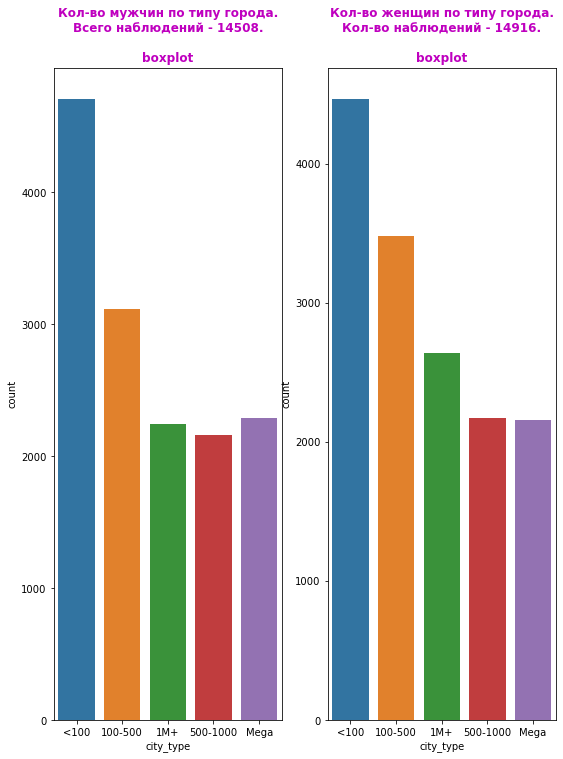

In [19]:
df_vis = df.copy()
fig, ax = plt.subplots(1,2)

df_vis_males = df[df_vis.gender == "М"]
df_vis_females = df[df_vis.gender == "F"]
city_order = list(df_vis.city_type.unique())

sns.countplot(df_vis_males['city_type'], order = city_order, ax=ax[0]);
ax[0].set_title('Кол-во мужчин по типу города.\n'\
                f'Всего наблюдений - {df_vis_males.shape[0]}.\n\n'\
                'boxplot',
                size=12, color='m', weight='bold');

sns.countplot(df_vis_females['city_type'], order = city_order, ax=ax[1]);
ax[1].set_title(f'Кол-во женщин по типу города.\n'\
                f'Кол-во наблюдений - {df_vis_females.shape[0]}.\n\n'\
                'boxplot', 
                size=12, color='m', weight='bold');

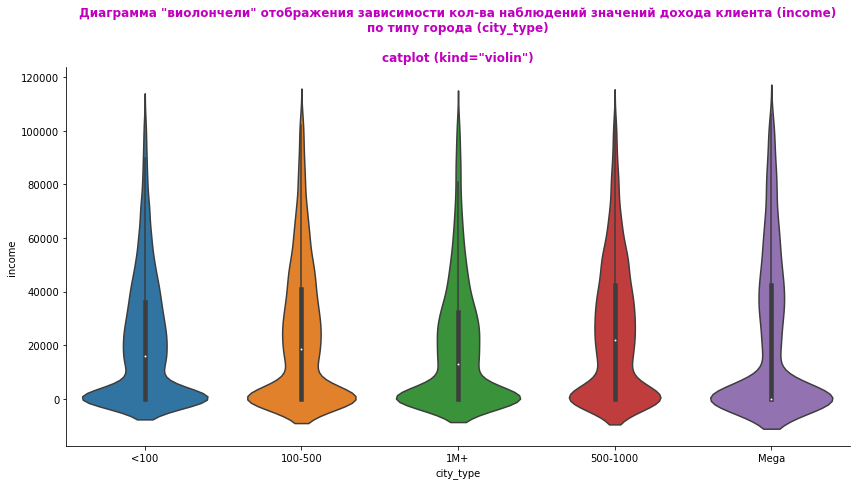

In [20]:
df_vis = df.copy()

query = get_drop_extreme_values_query(df_vis, ["income"])
df_after_drop_extreme_values = df_vis.query(query)

sns.catplot(
    x='city_type',
    y='income',
    data=df_after_drop_extreme_values,
    kind='violin',
    height=6,
    aspect=2)
plt.title('Диаграмма "виолончели" отображения зависимости кол-ва наблюдений значений дохода клиента (income)\n'\
          'по типу города (city_type)\n\n'\
          'catplot (kind="violin")', 
          size=12, color='m', weight='bold');

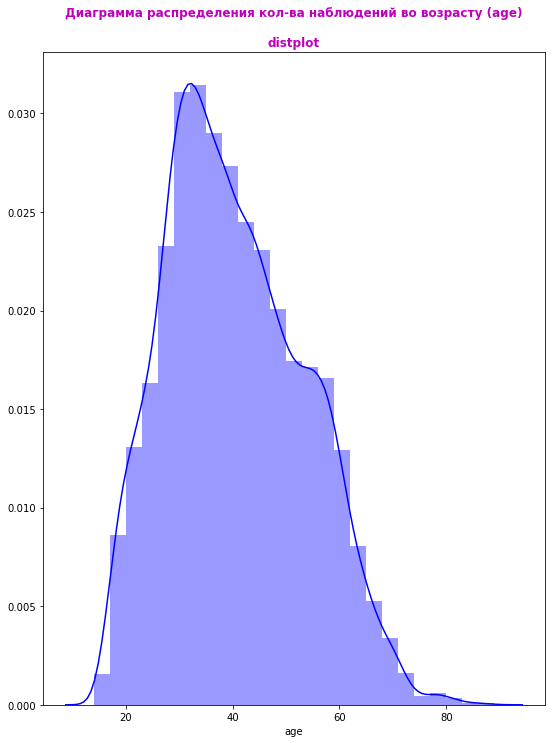

In [21]:
df_vis = df.copy()

sns.distplot(
    df_vis.age,
    color='blue',
    bins=25
)
plt.title('Диаграмма распределения кол-ва наблюдений во возрасту (age)\n\n'\
          'distplot', 
          size=12, color='m', weight='bold')
plt.show();

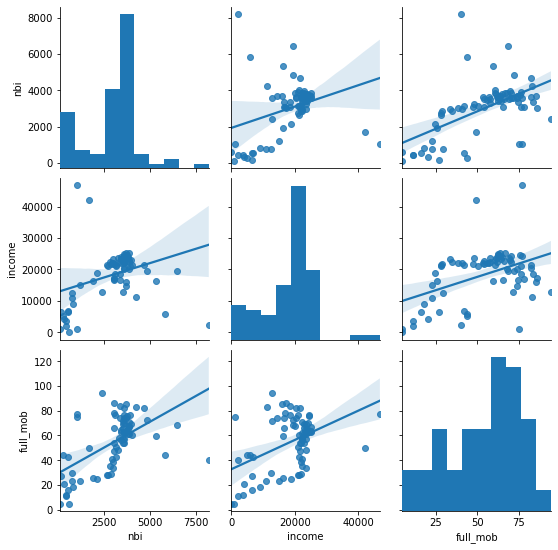

In [22]:
df_vis = df.copy()
cols = ['nbi', 'income', 'full_mob']

query = get_drop_extreme_values_query(df_vis, cols)
df_vis = df_vis.query(query)

df_vis = df_vis.groupby(["age"]).mean().reset_index()

df_items = df_vis.loc[:,cols]
sns.pairplot(
    df_items,
    kind='reg'
);

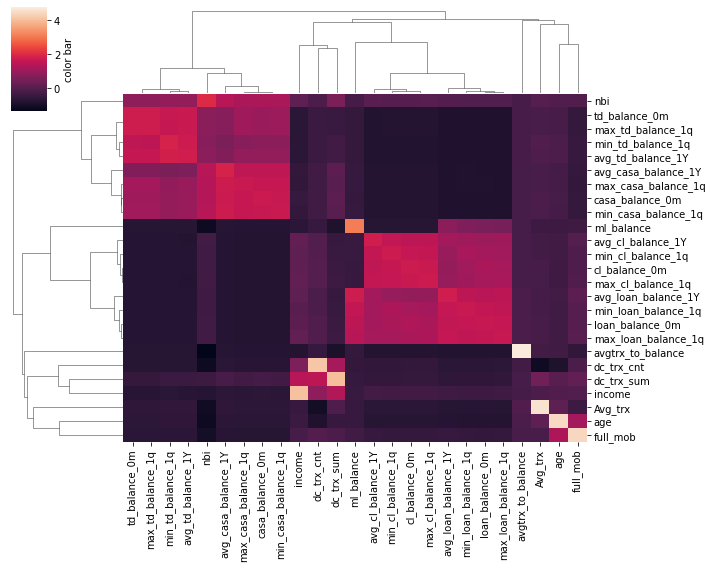

In [23]:
df_vis = df.copy()
corr = df_vis.corr()
sns.clustermap(
    corr, 
    figsize=(10,8),  
    z_score=1, 
    cbar_kws={"label": "color bar"}
);

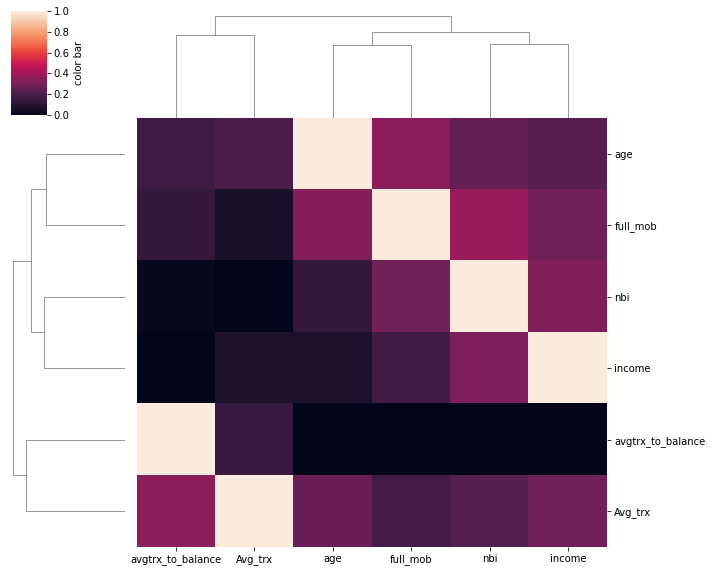

In [24]:
df_vis = df.copy()

cols = ['age', 'nbi', 'income', 'full_mob', 'avgtrx_to_balance', 'Avg_trx']
query = get_drop_extreme_values_query(df_vis, cols)
df_vis = df_vis.query(query)
df_vis = df_vis[cols]
corr = df_vis.corr()
sns.clustermap(
    corr, 
    figsize=(10,8),  
    cbar_kws={"label": "color bar"},
    standard_scale=1
);

### Кластеризация методом k-средних

In [25]:
df = pd.read_csv("test_cluster.csv", encoding="cp1251", sep=";")
df.shape

(50000, 28)

In [26]:
df1 = df.copy()
df1 = df1.drop(["loan_to_deposit"], axis=1)
df1 = df1.dropna()
df1.shape

(29424, 27)

In [27]:
# Изменение значений категориальных признаков
df2 = df1.copy()
def rename_cat_features_values(df, cat_cols):
    cat_dicts = {
        "gender": {
            "М": 0,
            "F": 1 },
        "city_type": {
            "<100": 0,
            "100-500": 1,
            "500-1000": 2,
            "1M+": 3,
            "Mega": 4 }
    }
    df_copy = df.copy()
    for cat_col in cat_cols:
        df_copy[cat_col] = df_copy[cat_col].apply(lambda x: cat_dicts[cat_col][x])
    return df_copy
df2 = rename_cat_features_values(df2, ["gender", "city_type"])

In [28]:
# Создадим новые признаки равные средним значениям по отдельным характеристикам относящимся к одной тематике (счета, кредиты и т.д)
df3 = df2.copy()

df3["cl_fact"] = df3.eval("(cl_balance_0m + min_cl_balance_1q + max_cl_balance_1q + avg_cl_balance_1Y)")
df3["cl_fact"] = df3["cl_fact"].apply(lambda x: int(x!=0))
df3 = df3.drop(["cl_balance_0m", "min_cl_balance_1q", "max_cl_balance_1q", "avg_cl_balance_1Y"], axis=1)

df3["loan_fact"] = df3.eval("(loan_balance_0m + min_loan_balance_1q + max_loan_balance_1q + avg_loan_balance_1Y)/4")
df3["loan_fact"] = df3["loan_fact"].apply(lambda x: int(x!=0))
df3 = df3.drop(["loan_balance_0m", "min_loan_balance_1q", "max_loan_balance_1q", "avg_loan_balance_1Y"], axis=1)

df3["td_fact"] = df3.eval("(td_balance_0m + min_td_balance_1q + max_td_balance_1q + avg_td_balance_1Y)/4")
df3["td_fact"] = df3["td_fact"].apply(lambda x: int(x!=0))
df3 = df3.drop(["td_balance_0m", "min_td_balance_1q", "max_td_balance_1q", "avg_td_balance_1Y"], axis=1)

df3["ml_fact"] = df3["ml_balance"].apply(lambda x: int(x!=0))
df3 = df3.drop(["ml_balance"], axis=1)

df3["casa_score"] = df3.eval("(casa_balance_0m + min_casa_balance_1q + max_casa_balance_1q + avg_casa_balance_1Y)/4")
df3 = df3.drop(["casa_balance_0m", "min_casa_balance_1q", "max_casa_balance_1q", "avg_casa_balance_1Y"], axis=1)

df3.head()

,age,gender,city_type,full_mob,dc_trx_cnt,dc_trx_sum,income,Avg_trx,avgtrx_to_balance,nbi,cl_fact,loan_fact,td_fact,ml_fact,casa_score
9,36,0,0,154,83,324947.73,22100.00,3915.032892,4.383411,6065.052515,0,1,0,0,2771.776875
10,56,1,0,165,341,451481.51,36694.37,1323.992698,0.226536,8009.940315,0,1,1,0,2596.217500
11,19,0,1,40,72,15529.58,1293.60,215.688611,0.992718,684.233442,0,0,0,0,79.600208
12,20,1,3,3,105,126229.83,44169.00,1202.188857,0.063129,157.694118,0,0,0,0,15807.778125
13,51,0,1,37,189,783517.26,62108.23,4145.593968,0.130954,3054.122311,0,0,0,0,24261.194375


In [29]:
# Оставляем только наблюдения между (Q1-IQR; Q3+IQR) либо нулевые
df4 = df3.copy()

cols = [
        'age', 'nbi', 'income', 'full_mob',
        'casa_score',
        'Avg_trx', 'avgtrx_to_balance', 'dc_trx_cnt', 'dc_trx_sum'
       ]
query = get_drop_extreme_values_query(df4, cols)
df4 = df4.query(query)

In [30]:
# Переводим значение числового признака указывающего доход (income) в бинарный (есть/нету)
df4.income = df4.income.apply(lambda x: int(x!=0))

In [31]:
# Решаю уменьшить размер выборки по данным признакам.
df_c = df4.copy()
df_c = df_c.drop(['casa_score', 'full_mob', 'dc_trx_cnt', 'Avg_trx', 'dc_trx_sum'], axis=1)
df_c.nbi = (df_c.nbi-df_c.nbi.min())/(df_c.nbi.max()-df_c.nbi.min())

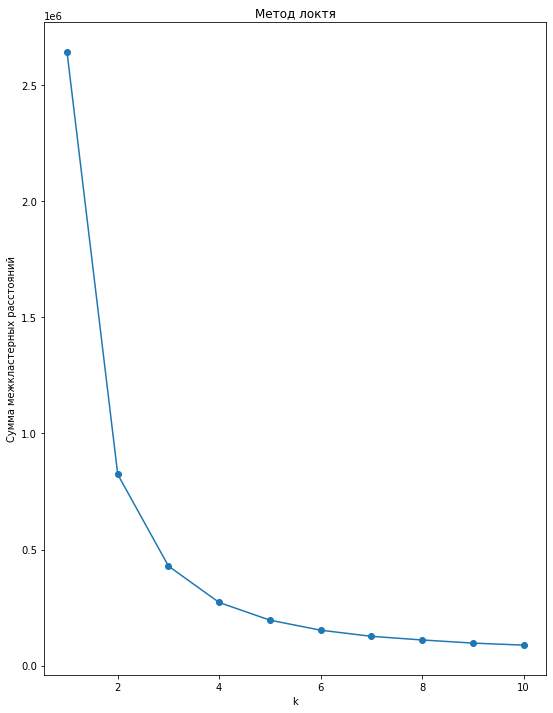

In [32]:
# поиск оптимального кол-ва кластеров
from sklearn.cluster import KMeans

K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=111).fit(df_c) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker="o")
plt.xlabel("k")
plt.ylabel("Сумма межкластерных расстояний")
plt.title("Метод локтя")
plt.show()

In [33]:
k = 3
model = KMeans(n_clusters=k, random_state=1)
model.fit(df_c)

KMeans(n_clusters=3, random_state=1)

In [34]:
for i in range(k):
    print(f"{(model.labels_==i).sum()}")

6782
5494
3459


In [35]:
df_c["label"] = model.labels_
df_c.groupby("label").mean()

,age,gender,city_type,income,avgtrx_to_balance,nbi,cl_fact,loan_fact,td_fact,ml_fact
label,,,,,,,,,,
0,26.868918,0.534651,1.525656,0.670599,0.531016,0.085601,0.088617,0.123710,0.015482,0.001917
1,41.351838,0.558609,1.539498,0.662541,0.537109,0.128923,0.134510,0.211139,0.030397,0.006553
2,57.491182,0.549292,1.456201,0.703961,0.569182,0.125611,0.137901,0.188783,0.050593,0.004047


#### Заключение по полученным кластерам.
Кластеры делят выборку 3 категории:
1. Размер кластера самый большой, более молодой сегмент, минимальный доход с клиента, меньший процент кредитов, меньше всего ипотек.
2. Размер кластера средний, средний возростной сегмент, доход с клиента и наличие кредитов сопоставимы с показателями в 3м кластере и превышают показатели в 1ом, средний процент общего кол-ва кредитов и ипотек в частности самый большой, показатель по депозитам средний.
3. Размер кластера самый маленький, более возростной сегмент, доход с клиента и наличие кредитов сопоставимы с показателями в 2м кластере и превышают показатели в 1ом, средний процент общего кол-ва кредитов и ипотек в частности средний, показатель по депозитам самый большой.

#### Вывод по датасету.

Из сгруппированных данных по наличию дохода, можно предположить, что признак **income** - указывает на оффициальный доход либо доход который был просто указан в выборке (т.к. неизвестно из каких источников и какими методами заполнялся датасет), следовательно дальнейшие предположения касаются того, что датасет делится на категорию людей **официально трудоустроенных/c указанным доходом** и **предпринимателей/самозанятых / с неуказанным доходом**. 

Признак **loan_to_deposit** - помимо большого кол-ва пропусков - имеет большое кол-во нулевых значений.

Датасет можно использовать, например, для задач по таргетированию рекламы предложений банковских продуктов (кредиты/ипотеки/вклады).